Total # images to process = 10
Reading Image img/0000.jpg
Original Image
shape (844, 1181, 3)


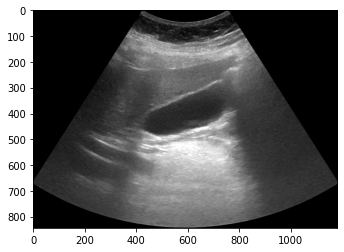



SMOOTH IMAGE
shape (844, 1181, 3)


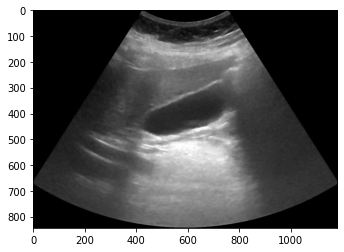

Improved contrast Image
Improved contrast + Smoothed
shape (844, 3543)


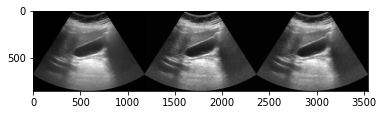

shape (844, 1181)


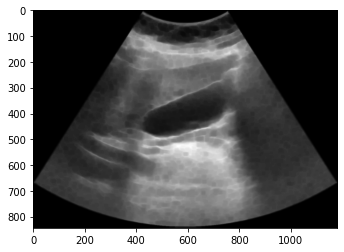

shape (844, 2362)


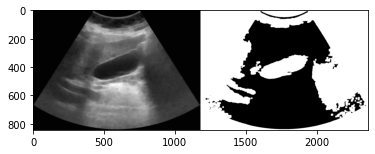

shape (844, 2362)


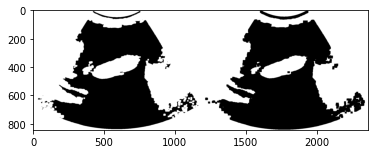

shape (844, 2362)


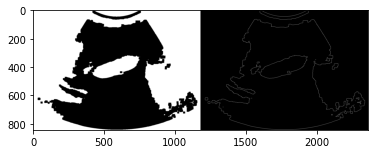

In [151]:
import os
import cv2 as cv
import json
from glob import glob
import numpy as np
import argparse
import matplotlib.pyplot as plt

def show_image(img, name="default",save=False):
    if img is None:
        print('Could not open or find the image: ', args.input)
        exit(0)
    else:
        '''cv2.imshow('image', image)
        cv2.waitKey(0)
        cv2.destroyAllWindows()'''
        print("shape", img.shape)
        fig = plt.figure(0)
        plt.imshow(img, cmap='gray')
        plt.show()
        if save:
            fig.savefig("plots/"+name+".png", dpi=300, format="png")
    return

def generate_mask_old(img):
    print("Reading Image:", img)
    image = cv.imread(img)
    #image = cv.cvtColor(image,cv.COLOR_BGR2GRAY)
    print("Original Image")
    show_image(image)

    image = cv.fastNlMeansDenoising(image, None, h=15, templateWindowSize=7, searchWindowSize=21) 
    print("Smoothed Image")
    show_image(image)
    kernel = np.ones((5,5), np.uint8) 
    image = cv.erode(image, kernel, iterations=3) 
    print("Erorded Image")
    show_image(image)
    #image = cv.Sobel(image,cv.CV_64F,1,1,ksize=5)
    edges = cv.Canny(image,threshold1=25, threshold2=100,apertureSize=3,L2gradient=True)    
    print("CANNY")
    show_image(edges)
    # how_image(image)
    gray = cv.cvtColor(image,cv.COLOR_BGR2GRAY)
    #show_image(gray)
    gray = image
    ret, thresh = cv.threshold(gray,55,255,cv.THRESH_BINARY_INV)
    show_image(thresh)

    kernel = np.ones((3, 3), np.uint8) 
    closing = cv.morphologyEx(thresh, cv.MORPH_CLOSE, 
                                kernel, iterations = 2) 
    
    # Background area using Dialation 
    bg = cv.dilate(closing, kernel, iterations = 3) 
    
    # Finding foreground area 
    dist_transform = cv.distanceTransform(closing, cv.DIST_L2, 0) 
    ret, fg = cv.threshold(dist_transform, 0.02
                            * dist_transform.max(), 255, 0) 
    show_image(fg)


def generate_mask(img):
    print("Reading Image", img)
    orig_image = cv.imread(img)
    print("Original Image")
    show_image(orig_image)
    
    image = cv.bilateralFilter(orig_image, d=9,sigmaColor=100,sigmaSpace=100,borderType=cv.BORDER_REPLICATE)
    print("\n\nSMOOTH IMAGE")
    show_image(image)
    clahe = cv.createCLAHE(clipLimit=1, tileGridSize=(8,8))
    imp_cont_image = clahe.apply(cv.cvtColor(image,cv.COLOR_BGR2GRAY))
    print("Improved contrast Image")
    
    imp_cont_smt_image = cv.bilateralFilter(imp_cont_image, d=9,sigmaColor=100,sigmaSpace=100,borderType=cv.BORDER_REPLICATE)
    print("Improved contrast + Smoothed")
    
    show1 = cv.hconcat([cv.cvtColor(image, cv.COLOR_BGR2GRAY),imp_cont_image, imp_cont_smt_image])
    show_image(show1)

    kernel = np.ones((5,5), np.uint8) 
    erode_img = cv.erode(imp_cont_smt_image, kernel, iterations=2) 
    show_image(erode_img)

    ret, th_img = cv.threshold(erode_img,60,255,cv.THRESH_BINARY_INV)
    show3 = cv.hconcat([erode_img, th_img])
    show_image(show3,"thresh",True)

    kernel = np.ones((3, 3), np.uint8) 
    #open = cv.morphologyEx(canny_edges, cv.MORPH_OPEN, kernel, iterations = 1) 
    open_close = cv.morphologyEx(th_img, cv.MORPH_CLOSE, kernel, iterations = 2) 
    kernel = np.ones((5,5), np.uint8) 
    open_close = cv.erode(open_close, kernel, iterations=2)
    show4 = cv.hconcat([th_img, open_close])
    show_image(show4, "Th Close", True)

    canny_edges = cv.Canny(open_close,threshold1=45, threshold2=45,apertureSize=3,L2gradient=False)

    show2 = cv.hconcat([open_close, canny_edges])
    show_image(show2, "Close Canny", True)

    contours, hierarchy = cv.findContours(open_close, cv.RETR_CCOMP, cv.CHAIN_APPROX_NONE)    

    '''
    
    kernel = np.ones((5,5), np.uint8) 
    erode_img = cv.erode(imp_cont_smt_image, kernel, iterations=1) 

    show2 = cv.hconcat([imp_cont_smt_image, erode_img])
    show_image(show2)

    ret, th_img = cv.threshold(erode_img,60,255,cv.THRESH_BINARY_INV)
    show3 = cv.hconcat([erode_img, th_img])
    show_image(show3)

    contours, hierarchy = cv.findContours(th_img, -1, cv.CHAIN_APPROX_NONE)
    max_contour = max(contours, key = cv.contourArea)
    output = np.zeros(th_img.shape)
    print(len(contours))

    cv.drawContours(output, contours[0], -1, (255,255,255), -1)

    show_image(output)



    kernel = np.ones((3, 3), np.uint8) 
    open = cv.morphologyEx(th_img, cv.MORPH_OPEN, kernel, iterations = 2) 

    open_close = cv.morphologyEx(th_img, cv.MORPH_CLOSE, kernel, iterations = 2) 

    show4 = cv.hconcat([show3, open, open_close])
    show_image(show4, True)
'''
    return contours, hierarchy




if __name__ == "__main__":
   
    
    img_path = "img"
    
    images = glob(os.path.join(img_path,"*.jpg"))

    print("Total # images to process =", len(images))

    #for img in images:
    ctr, hrcy = generate_mask(images[0])

22
Area 1890.0
Area 7437.5
Area 29680.0
shape (844, 1181)


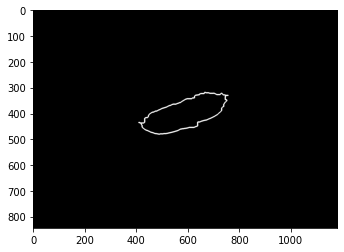

Area 455895.0
Area 994740.0


In [152]:
print(len(ctr))
ctr = sorted(ctr, key=cv.contourArea) 
big_ctr = ctr[-5:]
for c in big_ctr:
    area = cv.contourArea(c)
    print("Area",area)
    if area > 10000 and area < 100000:
        output = np.zeros((844,1181))
        cv.drawContours(output, c, -1, (255,255,255), 3)
        show_image(output)

In [133]:
c_ar = []
big_ctr = {}
for c in range(len(ctr)):
    ar = cv.contourArea(ctr[c])
    print(ar)
    c_ar.append(ar)
c_ar.sort()
print("mean", np.mean(c_ar[-5]))
print("median", np.median(c_ar))
mean = np.mean(c_ar[-5])
for c in range(len(ctr)):
    ar = cv.contourArea(ctr[c])
    if ar > mean:
        big_ctr[c] = ctr[c]
len(big_ctr)

98.5
191.0
1533.0
551.0
174.0
151.0
25084.5
418.0
1121.5
4795.0
983781.0
260.5
40.0
131.0
76.0
4073.0
52.0
44.5
61.5
89.0
88.5
41.5
114.0
43.5
44.0
1220.0
31.0
317393.5
mean 4073.0
median 141.0


4

6
shape (844, 1181)


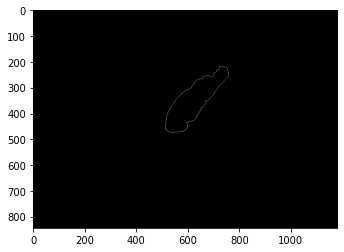

9
shape (844, 1181)


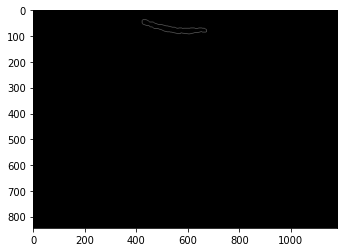

10
shape (844, 1181)


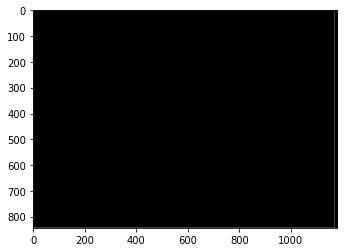

27
shape (844, 1181)


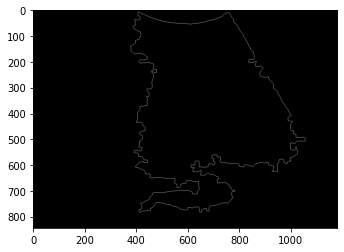

In [134]:
for k, c in big_ctr.items():
    print(k)
    output = np.zeros((844,1181))
    cv.drawContours(output, c, -1, (255,255,255), -1)
    show_image(output)

In [124]:
cv.contourArea(np.array([[0,0],[844,0],[844,1181],[0,1181]]))

996764.0

shape (844, 1181)


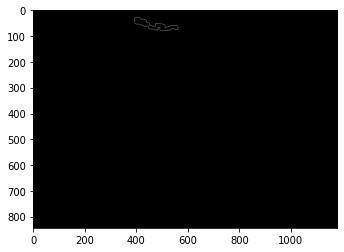

In [113]:
output = np.zeros((844,1181))
cv.drawContours(output, ctr[15], -1, (255,255,255), -1)
show_image(output)